In [2]:
from google.colab import files
uploaded = files.upload()


Saving Fuel_cell_performance_data-Full.csv to Fuel_cell_performance_data-Full.csv


!wget https://github.com/psrana/Lab-and-Assignment-2024/blob/main/Fuel_cell_performance_data-Full.csv


In [8]:
import pandas as pd

# Replace 'dataset.csv' with the name of your file
data = pd.read_csv('Fuel_cell_performance_data-Full.csv')

# Display the first few rows of the dataset
data.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,Target2,Target3,Target4,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,0.959,1.531,79.3,4.19,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,0.728,1.690,57.2,5.19,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,0.784,1.865,61.6,7.77,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,0.884,1.920,71.3,8.40,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,0.736,1.711,58.5,4.75,52.32


In [12]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load your dataset (assuming it's already loaded)
# data = pd.read_csv('Fuel_cell_performance_data-Full.csv')

# # Step 1: Extract only the feature columns (F1, F2, F3, etc.)
# X = data.filter(regex='^F')  # Select all columns starting with 'F' (F1, F2, F3, ...)

# # Step 2: Select the 3rd target column (e.g., T3)
# y = data.iloc[:, 2]  # Assuming T1, T2, T3 are the 1st, 2nd, and 3rd columns, index 3 is the 3rd target column

# # Step 3: Split the data into training (70%) and testing (30%) sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Step 4: Verify the split by printing the shapes
# print(f"Training Features Shape: {X_train.shape}")
# print(f"Test Features Shape: {X_test.shape}")
# print(f"Training Target Shape: {y_train.shape}")
# print(f"Test Target Shape: {y_test.shape}")


Training Features Shape: (700, 15)
Test Features Shape: (300, 15)
Training Target Shape: (700,)
Test Target Shape: (300,)


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (assuming it's loaded already)
data = pd.read_csv('Fuel_cell_performance_data-Full.csv')

# Step 1: Extract only the feature columns (F1, F2, F3, etc.)
# Assuming feature columns are all the columns starting with 'F'
X = data.filter(regex='^F')  # This will select columns starting with 'F'

# Step 2: Select only one target column (e.g., T1)
# Assuming you want the first target column 'T1'
y = data['Target3']  # Replace 'T1' with the column name you want

# Step 3: Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Verify the split by printing the shapes
print(f"Training Features Shape: {X_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Target Shape: {y_test.shape}")


Training Features Shape: (700, 15)
Test Features Shape: (300, 15)
Training Target Shape: (700,)
Test Target Shape: (300,)


Import necessary libraries:

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score


Evaluate the Results:

In [18]:
# Create a dictionary to store models and their names
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor()
}

# Store the results
results = {}

# Loop through each model, train it, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "Mean Absolute Error": mae,
        "R-squared": r2
    }

# Display the results
for model_name, metrics in results.items():
    print(f"{model_name} - MAE: {metrics['Mean Absolute Error']}, R-squared: {metrics['R-squared']}")


Linear Regression - MAE: 3.9204347015558443, R-squared: 0.2539989257973386
Decision Tree - MAE: 5.601999999999999, R-squared: -0.6574388536294891
Random Forest - MAE: 4.0401133333333314, R-squared: 0.19119815852308464
Support Vector Machine (SVR) - MAE: 4.164445390984654, R-squared: 0.15548522374586815
K-Nearest Neighbors (KNN) - MAE: 4.570533333333333, R-squared: -0.033603521558035254


Regression Models Evaluation:

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np


Detailed Analysis

In [31]:
# Assuming you've already split the data into X_train, X_test, y_train, y_test
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor()
}

# Store the results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model using MAE, MSE, RMSE, and R²
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2
    }

# Print the evaluation metrics
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 50)


Linear Regression:
  MAE: 3.9204
  MSE: 21.8660
  RMSE: 4.6761
  R-squared: 0.2540
--------------------------------------------------
Decision Tree:
  MAE: 5.8050
  MSE: 51.1200
  RMSE: 7.1498
  R-squared: -0.7441
--------------------------------------------------
Random Forest:
  MAE: 4.0886
  MSE: 23.8307
  RMSE: 4.8817
  R-squared: 0.1870
--------------------------------------------------
Support Vector Regressor (SVR):
  MAE: 4.1644
  MSE: 24.7535
  RMSE: 4.9753
  R-squared: 0.1555
--------------------------------------------------
K-Nearest Neighbors (KNN):
  MAE: 4.5705
  MSE: 30.2959
  RMSE: 5.5042
  R-squared: -0.0336
--------------------------------------------------


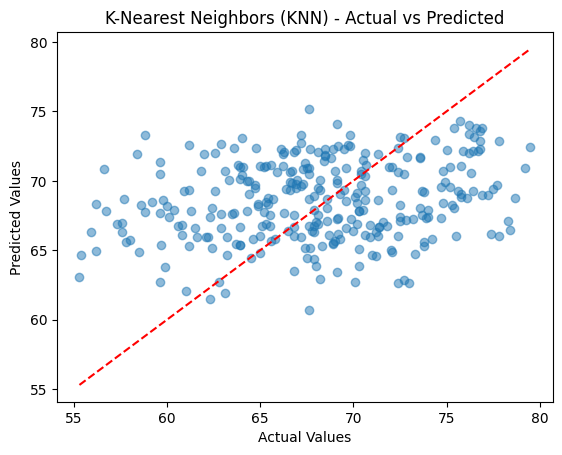

In [32]:
import matplotlib.pyplot as plt

# For classification tasks, you can plot confusion matrix (as shown previously)
# For regression tasks, you can plot the actual vs predicted values.

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"{model_name} - Actual vs Predicted")
plt.show()
